In [1]:
import numpy as np
import matplotlib.pyplot as plt

# German Tank Probem

You are a British spy trying to record how many tanks the Germans have. You know that every new tank produced is given a serial number, with the smallest number being 1. So the first tank built has a serial number of 1, the second 2, and so on…


You jot down the serial numbers that you spotted. On the way back you get ambushed and lose the information. All you remember is that the smallest number is 22 and the largest is 114.
How many tanks do the Germans have?

In [2]:
#min and max observed serial numbers
min_serial = 22
max_serial = 114

In [10]:
#store mins and max
mins = []
maxes = []

for _ in range(200_000):
    #get random observations
    serials = np.random.randint(min_serial, max_serial+1, 20)
    #store min and max
    mins.append(serials.min())
    maxes.append(serials.max())

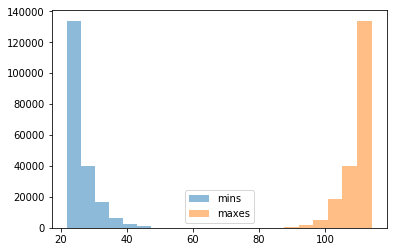

In [11]:
plt.hist(mins, alpha=0.5, label = 'mins')
plt.hist(maxes, alpha=0.5, label = 'maxes')
plt.legend()
plt.savefig('plots/tanks_hist_20.png')
plt.show()

# Wooden Sticks

We have a stick make of wood of some random length L. We pick two random points along the length and cut the stick at those points. We now have 3 smaller sticks.
What's the probability we can form a triangle from those 3 sticks?

In [5]:
#number of successes, number of trials
success = 0
n_trial = 200_000

for _ in range(n_trial):
    #draw two samples from a uniform distribution
    points = np.sort(np.random.uniform(0, 1, 2))
    #record location of first point
    one = points[0]
    #record distance between points
    two = points[1] - points[0]
    #get the third point
    three = 1 - points[1]
    
    #make sure all points inside the stick
    assert one + two + three == 1
    
    #sort by length
    lengths = np.sort([one, two, three])
    
    #triangle inequality
    if ((lengths[0] + lengths[1]) > lengths[2]) and ((lengths[1] + lengths[2]) > lengths[0]):
        if (lengths[0] + lengths[2]) > lengths[1]:
            success += 1

print(success/n_trial)

0.25133


# Loaded Dice

A bag contains 9 dice, 8 are fair and one is loaded. The loaded dice will always return a 6.
We draw a random dice from the bag, roll it twice and get a 6 both times.
What's the chance we picked the loaded dice?

In [6]:
#record wins by fair and cheating
cheat_win = 0
fair_win = 0

for _ in range(100_000):
    #pick random dice from the bag
    dice = np.random.randint(1 , 10)
    #if cheat count as cheat win
    if dice == 1:
        cheat_win += 1
    #if fair, roll the dice twice
    else:
        roll = np.random.randint(1, 7, 2)
        #report fair wins
        if np.array_equal(roll, [6, 6]):
            fair_win += 1

#get proportion of wins
print(cheat_win/(fair_win+cheat_win))

0.818788462964336
